# Проект: Статистический анализ данных
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- **Без подписки**  

    > абонентская плата — ***отсутствует***
    
    > стоимость одной минуты поездки — ***8 рублей***
    
    > стоимость старта (начала поездки) — ***50 рублей***
- **с подпиской *Ultra*:**
    > абонентская плата — ***199 рублей в месяц***
    
    > стоимость одной минуты поездки — ***6 рублей***
    
    > стоимость старта — ***бесплатно***

# План работ

- [Шаг 1. Загрузка данных.](#section_1)

- [Шаг 2. Предобработка данных.](#section_2)

- [Шаг 3. Исследовательский анализ данных.](#section_3)

- [Шаг 4. Объединение данных.](#section_4)

- [Шаг 5. Подсчёт выручки.](#section_5)

- [Шаг 6. Проверка гипотез.](#section_6)

- [Шаг 7. Распределения.](#section_7)

- [Шаг 8. Общий вывод.](#section_8)

<a id='section_1'></a>

### Шаг 1. Загрузка данных

#### Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы

In [1]:
#Имортируем необходимые библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, norm
from math import sqrt

In [2]:
#Распаковываем и считываем данные:
try:
    #Данные о пользователях:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    
    #Данные о поездках:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    
    #Данные о подписках:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
    
#Если не получается выгрузить данные с сети, то считываем их из локальной папки:
except:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

#### Изучаем общую информацию о каждом датафрейме

In [3]:
#Первые 15 строк данных о пользователях:
users.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
#Общая информация о таблице с пользователями:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


- В датафрейме ***Users*** предоставлена информация о идентификаторе пользователя, его имени и возрасте, также указан город и тип подписки. 
- Таблица содержит **1565** строк.

In [5]:
#Первые 15 строк данных о поездках:
rides.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
#Общая информация о таблице с поездками:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


- В датафрейме ***Rides*** предоставлена информация о поездках пользователей: расстояние, продолжительность и дата совершения поездки. 
- Таблица содержит **18068** строк.

In [7]:
#Первые строки данных о подписках:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
#Общая информация о таблице с подписками:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


- В датафрейме ***Subscriptions*** предоставлена информация связанная с подписками: тип подписки, цена поездки за минуту, стоимость начала поездки и ежемесячного платежа. 
- Таблица содержит **2** строки.

**Самый большой массив данных из предоставленных - это данные о поездках. Это логично, ведь некоторые пользователи совершают поездки более одного раза. Объем информации о пользователях всегда будет меньше, чем о их поездах.**

<a id='section_2'></a>

### Шаг 2. Предобработка данных

#### Названия столбцов

In [9]:
for name in users.columns, rides.columns, subscriptions.columns:
    print(name)    

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')
Index(['user_id', 'distance', 'duration', 'date'], dtype='object')
Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')


- **Название переменных во всех столбцах соответсвует стандарту PEP8**

#### Временные параметры

- Приведем значение в столбце **date** датафрейма **rides** к временному типу:

In [10]:
#Приводим значения в столбце к временному типу:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
#Добавляем столбец с номером месяца:
rides['month'] = rides['date'].dt.month

In [11]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

In [12]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [13]:
rides.query('"2022" in date')

,user_id,distance,duration,date,month


In [14]:
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


#### Изменение типов данных

- Округлим значение в столбце ***distance*** датафрейма ***rides*** до 2-х знаков после запятой:

In [15]:
rides['distance'] = rides['distance'].round(2)

- Приведем столбец ***duration*** (время в столбце узказано в минутах) к целому типу, округлив значения:

In [16]:
rides['duration'] = np.ceil(rides['duration']).astype(int)

- Приведем к нижнему регистру столбцы ***name*** и ***city*** датафрейма ***Users***:

In [17]:
users['name'].str.lower()

0             кира
1        станислав
2          алексей
3       константин
4            адель
           ...    
1560         федор
1561          юрий
1562        ясмина
1563          юрий
1564       артемий
Name: name, Length: 1565, dtype: object

In [18]:
users['city'].str.lower()

0               тюмень
1                 омск
2               москва
3       ростов-на-дону
4                 омск
             ...      
1560         пятигорск
1561              сочи
1562         краснодар
1563            тюмень
1564    ростов-на-дону
Name: city, Length: 1565, dtype: object

#### Поиск пропусков

In [19]:
for i in users.isna().sum(), rides.isna().sum(), subscriptions.isna().sum():
    print(i)
    print()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64



- **В данных нет пропусов**

#### Поиск дубликатов

In [20]:
for i in users.duplicated().sum(), rides.duplicated().sum(), subscriptions.duplicated().sum():
    print(f'Дубликатов: {i}')
    print()

Дубликатов: 31

Дубликатов: 0

Дубликатов: 0



- **31 явный дубликат в таблице с пользователями *Users***

In [21]:
#Удалим все явные дубликаты:
users = users.drop_duplicates()

In [22]:
#Повторная проверка на наличие явных дубликатов:
users.duplicated().sum()

0

- **Теперь явных дубликатов не осталось**

**Вывод: данные полностью предобработаны. В процессе работы с данными не было обнаружено пропусков. Был найден 31 дубликат, которые были удалены из данных. Остальные данные и значения были округлены и приведены к определенным типам, необходимым для дальнейшей работы.**

<a id='section_3'></a>

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

In [23]:
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

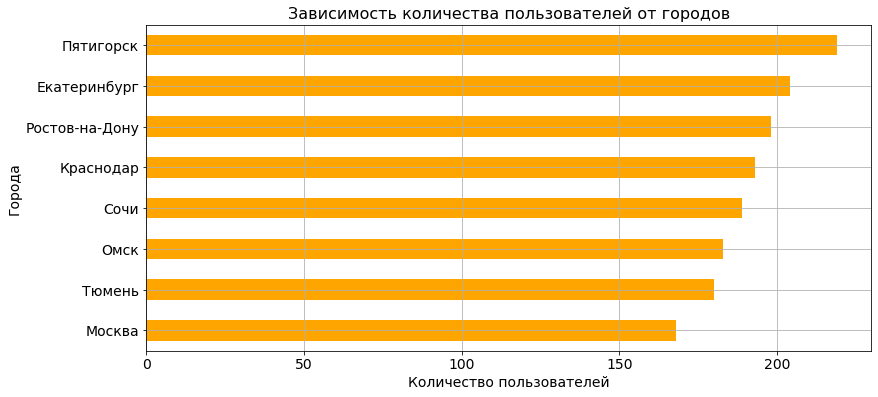

In [24]:
(
users
    .pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values('user_id', ascending=True)
    .plot(kind='barh', legend=False, figsize=(13,6), grid=True, color='orange', fontsize=14)
)
plt.xlabel('Количество пользователей', size=14)
plt.ylabel('Города', size=14)
plt.title('Зависимость количества пользователей от городов', size=16)
plt.show()

**В Пятигорске больше всего арендуют электросамокаты, в то время как в Москве меньше всего.**

#### Соотношение пользователей с подпиской и без подписки

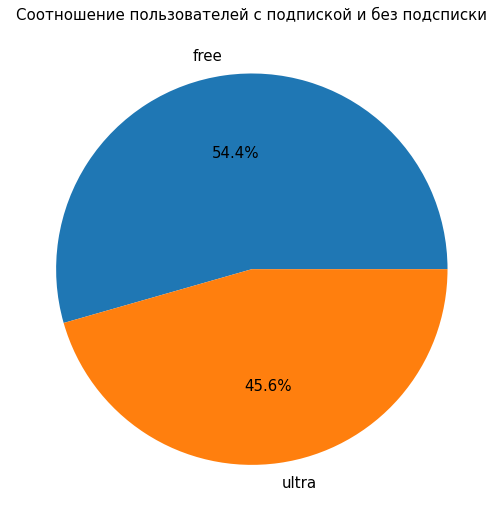

In [25]:
(
users
    .groupby('subscription_type')['user_id'].count()
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15)
)
plt.title('Соотношение пользователей с подпиской и без подсписки', size=15)
plt.ylabel('')
plt.show()

In [26]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

**Количесивтво пользователей, использующих подписку *Ultra*, составляет 45,6% от общего числа пользователей. Количество пользователей без подписки занимают немного большую долю, как видно из диаграммы.**

#### Возраст пользователей

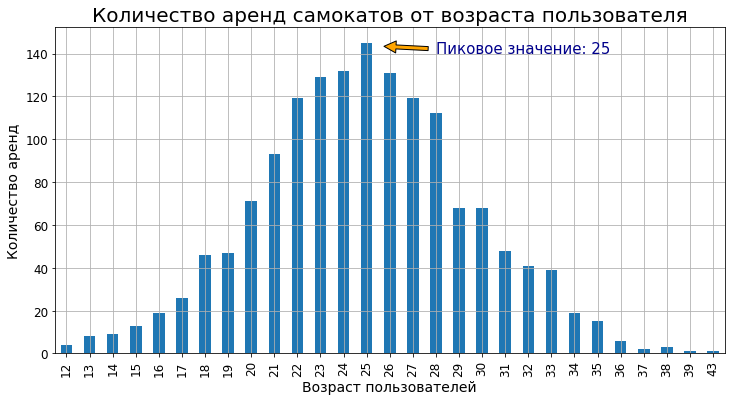

In [27]:
(
users
    .pivot_table(index='age', values='user_id', aggfunc='count')
    .sort_values('age', ascending=True)
    .plot(kind='bar', figsize=(12,6), legend=False, fontsize=12, grid=True)
)
plt.xlabel('Возраст пользователей', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Количество аренд самокатов от возраста пользователя', size=20)
plt.annotate('Пиковое значение: 25', xy=(13.5, 143.5), xytext=(16,140),
            arrowprops={'facecolor': 'orange', 'shrink': 0.1}, size=15, c='darkblue')
plt.show()

In [28]:
#Самое часто встречаемое значение:
users['age'].mode()[0]

25

**Самокаты арендуют пользователи начиная с 12 лет и заканчивая 43 годами. Самое большое число съемов самокатов наблюдается в возрасте 25 лет. Если посмотреть на столбчатую диаграмму, можно заметить, что по мере удаления от пикового знаечния другие значения равномерно убывают, нет больших всплесков и спадов.**

#### Расстояние, которое пользователь преодолел за одну поездку

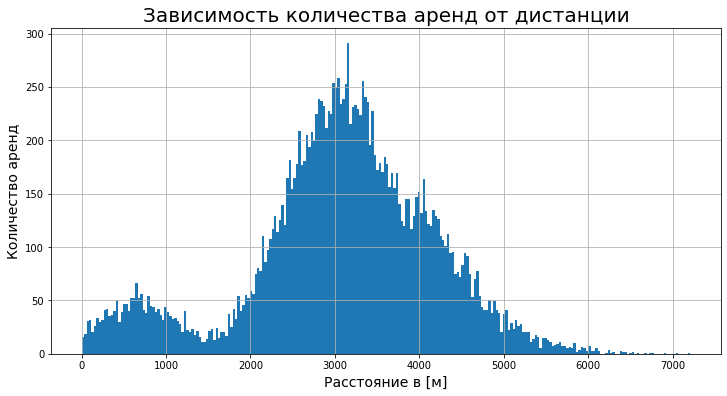

In [29]:
rides['distance'].hist(figsize=(12,6), bins=250)
plt.xlabel('Расстояние в [м]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количества аренд от дистанции', size=20)
plt.show()

In [30]:
rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

In [31]:
#Определим моду
rides['distance'].mode()[0]

3546.79

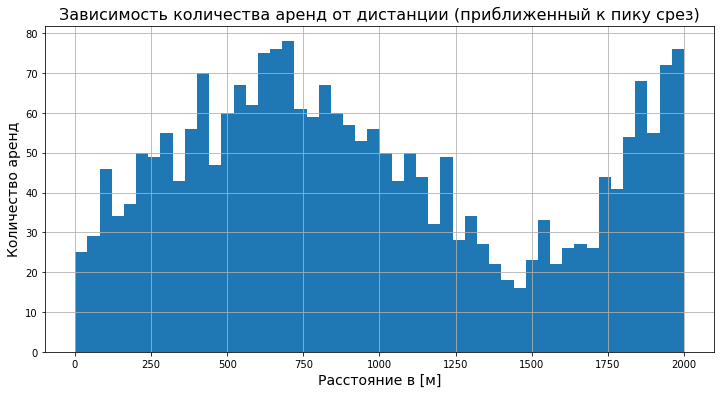

In [32]:
#Интервал до 2км, для демонстрации второго пика гистограммы:
(
rides
    .query('distance<2000')
    .hist('distance', bins=50, figsize=(12,6))
)
plt.xlabel('Расстояние в [м]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количества аренд от дистанции (приближенный к пику срез)', size=16)
plt.show()

**Гистограмма имеет два пика. Первый пик 3.5 км - знаечние которое встречалось чаще всего. В среднем люди за ссесию проезжают порядка 2.5 - 3.7 км. (межквартильный размах). Второй пик в районе 700 м. настораживает. Скорей всего пик в данной области связан с простоем самоката.**

#### Продолжительность поездок

In [33]:
#Рассмотрим максимально долгую поездку:
rides['duration'].max()

41

**Так как поездки мы приводили к целочиленному типу, в местах между 1 и 2 мин, к примеру, у нас отсутвуют значения. Т.е. значения стали еще реже, хотя и без этого они были дискретны. Поэтому будем рассматривать интервал до максимального значения.**

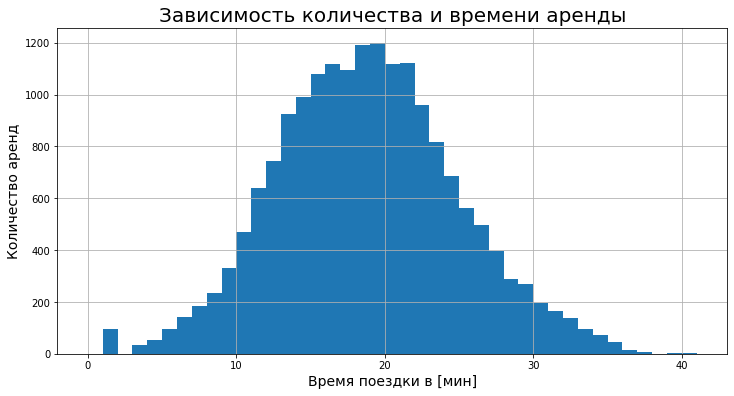

In [34]:
rides['duration'].hist(figsize=(12,6), bins=41, range=(0,41))
plt.xlabel('Время поездки в [мин]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количества и времени аренды', size=20)
plt.show()

In [35]:
rides['duration'].mode()[0]

19

In [36]:
rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

**Из гистограммы видно, что время стремится к нормальному распределению. Наиболее часто встречающееся знаечние состовляет 19 мин.**

**Вывод:**

- В Пятигорске арендуют самокаты чаще всего, реже всего в Москве.

- Количество пользователей с подпиской и без почти одинаково. 45% от общего числа пользователей - имеют подписку.

- Возраст на который приходится пик аренд - 25 лет.

- Оснавная масса значений расстояния, которое проезжают пользователи, попадает в интервал от 2.5 до 3.7 км.

- Медианное время аренды самоката состовлет 18 мин.

**Возраст, расстояние и время, исходя из построенных гистограмм и графиков, стремятся к нормальному распределению.**

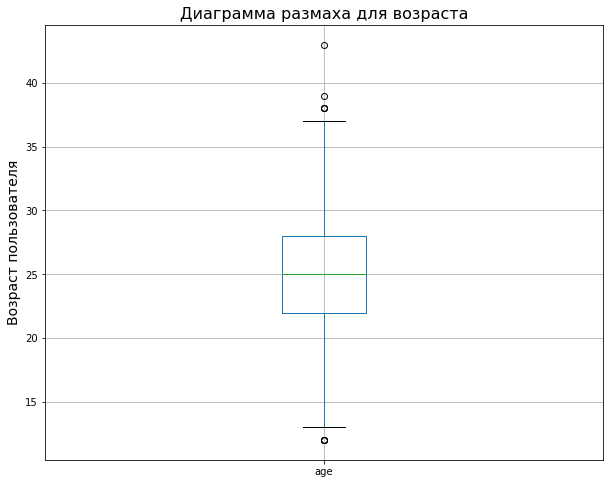

In [37]:
plt.figure(figsize=(10,8))
users.boxplot('age')
plt.ylabel('Возраст пользователя', size=14)
plt.title('Диаграмма размаха для возраста', size=16)
plt.show()

**Диграмма размаха для возраста имеет малое количество выбросов.**

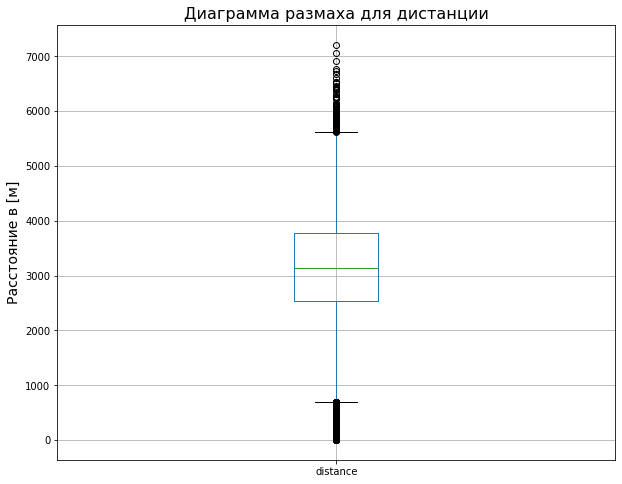

In [38]:
plt.figure(figsize=(10,8))
rides.boxplot('distance')
plt.ylabel('Расстояние в [м]', size=14)
plt.title('Диаграмма размаха для дистанции', size=16)
plt.show()

**Диаграмма размаха для дистанции имеет много выбросов, это связано с величиной выборки, но удалять эти значения мы не можем, ввиду их корректности.**

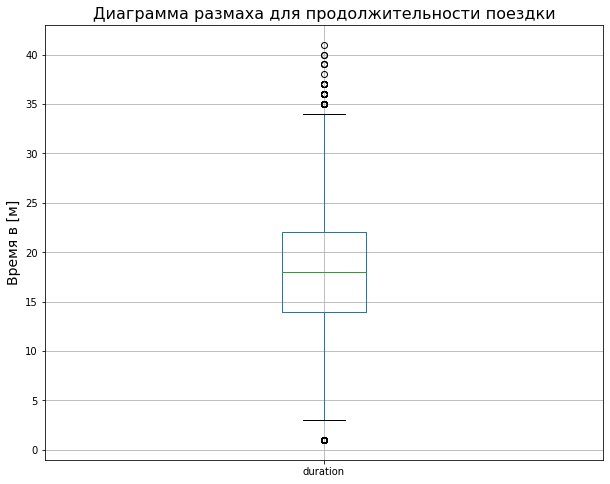

In [39]:
plt.figure(figsize=(10,8))
rides.boxplot('duration')
plt.ylabel('Время в [м]', size=14)
plt.title('Диаграмма размаха для продолжительности поездки', size=16)
plt.show()

**Имеет мало выбросов, в основном поездки длятся от 14 до 22 мин**

<a id='section_4'></a>

### Шаг 4. Объединение данных

#### Объединяем три датафрейма с помощью merge

**Проверим размеры датафреймев до объединения:**

In [40]:
#Количество строк в каждом датафрейме до объединения:
for i in [users, rides, subscriptions]:
    print(i.shape[0])
    print()

1534

18068

2



In [41]:
#Создадим копию датафрейма с пользователями, чтобы не потерять его:
data = users.copy()

In [42]:
#Объеденим информацию о пользователях и поездках:
data = data.merge(rides)

In [43]:
#Добавим информацию о подписках:
data = data.merge(subscriptions)

**Проверим размеры после объединения:**

In [44]:
#Количество строк в датафрейме после объединения:
data.shape[0]

18068

**Размер датафрейма совподает по количеству строк с наибольшим значением, следовательно ошибки нет.**

In [45]:
#Проверим на наличие пропуском и явный дубликатов после объединения:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [46]:
data.duplicated().sum()

0

In [47]:
#Рассмотрим полученный датафрейм:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


#### Разбиваем датафрейм *data* на два датафрейма с информацией о пользователях с подпиской и без

In [48]:
#Возьмем срез по данным с подписой и сохраним его в новый датафрейм:
df_with_sub = data.query('subscription_type == "ultra"')

In [49]:
#Выведем этот дф:
df_with_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16,2021-10-17,10,6,0,199


In [50]:
#Возьмем срез по данным без подписки и сохраним его в новый датафрейм:
df_no_sub = data.query('subscription_type == "free"')

In [51]:
#Выведем этот дф:
df_no_sub

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


In [52]:
try:
    len(data) == len(df_with_sub) + len(df_no_sub)
    print('Количество строк разделенных датафреймов соответсвует количеству исходного!')
except:
    print('Датафреймы поделились с ошибкой')

Количество строк разделенных датафреймов соответсвует количеству исходного!


- Количество строк исходного датафрейма равно сумме количеств разделенных по подписке и без (проверка)

#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

##### Расстояние и продолжительность поездок пользователей с подпиской:

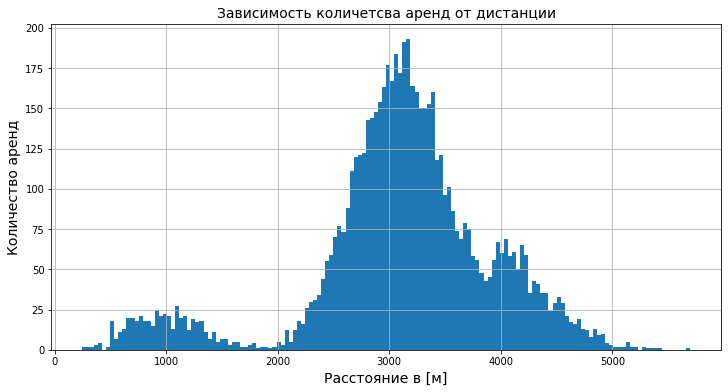

In [53]:
df_with_sub['distance'].hist(figsize=(12,6), bins=150)
plt.xlabel('Расстояние в [м]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от дистанции', size=14)
plt.show()

In [54]:
df_with_sub['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

**Остается пик в районе 700 м.**

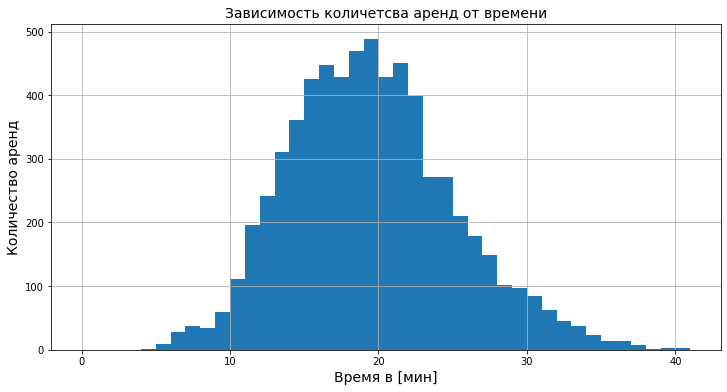

In [55]:
df_with_sub['duration'].hist(figsize=(12,6), bins=41, range=(0,41))
plt.xlabel('Время в [мин]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от времени', size=14)
plt.show()

In [56]:
#минимальное время аренды:
df_with_sub['duration'].min()

4

In [57]:
df_with_sub['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [58]:
df_with_sub['duration'].mode()[0]

19

**Значение моды не изменилось относительно общего**

##### Расстояние и продолжительность поездок пользователей  без подписки:

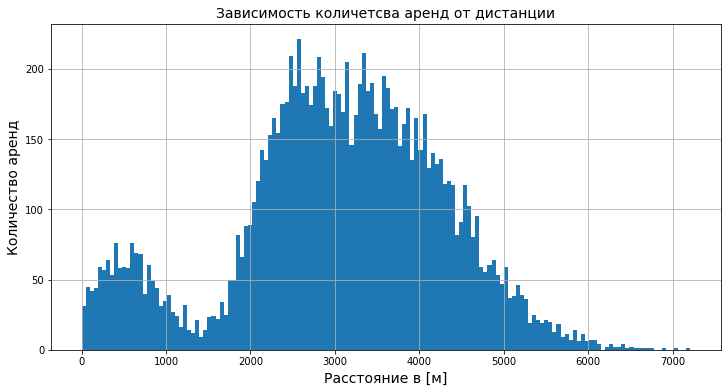

In [59]:
df_no_sub['distance'].hist(figsize=(12,6), bins=150)
plt.xlabel('Расстояние в [м]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от дистанции', size=14)
plt.show()

**Появилось смещение относительно центра**

In [60]:
df_no_sub['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

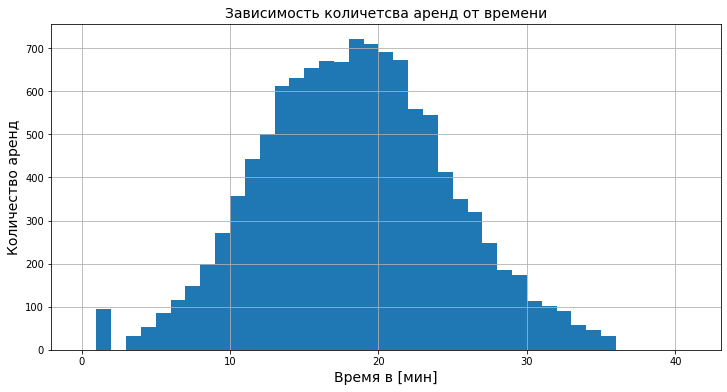

In [61]:
df_no_sub['duration'].hist(figsize=(12,6), bins=41, range=(0,41))
plt.xlabel('Время в [мин]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от времени', size=14)
plt.show()

In [62]:
df_no_sub['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [63]:
df_no_sub['duration'].mode()[0]

18

**Изменилось медианной значение, стало 18. Мода равна медиане.**

##### Наложение графиков для лучшей иллюстрации

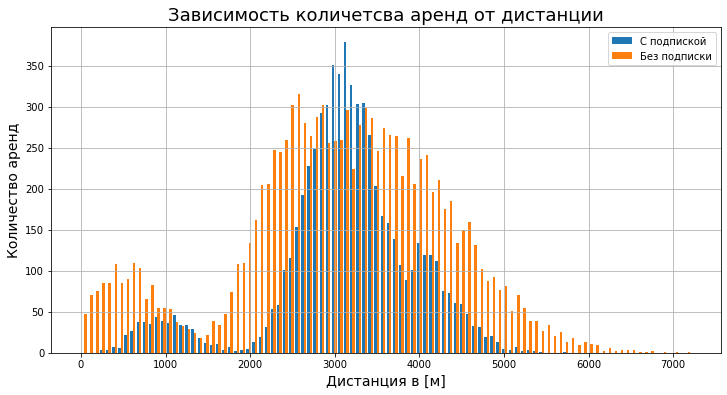

In [64]:
plt.figure(figsize=(12,6))
plt.hist([df_with_sub['distance'], df_no_sub['distance']], bins=100, alpha=1)
plt.legend(['С подпиской', 'Без подписки'])
plt.xlabel('Дистанция в [м]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от дистанции', size=18)
plt.grid()
plt.show()

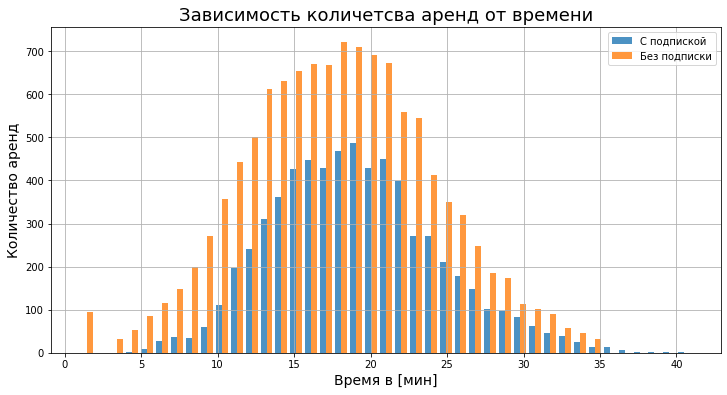

In [65]:
plt.figure(figsize=(12,6))
plt.hist([df_with_sub['duration'], df_no_sub['duration']], bins=41, alpha=0.8)
plt.legend(['С подпиской', 'Без подписки'])
plt.xlabel('Время в [мин]', size=14)
plt.ylabel('Количество аренд', size=14)
plt.title('Зависимость количетсва аренд от времени', size=18)
plt.grid()
plt.show()

**Теперь разница стала более наглядной.**
> Графики расстояния:

- Разброс значений без подписки больше, дисперсия выше. Следовательно стандартное отклонение у пользователей без подписки - больше. 

- Наибольшее количество аренд для пользователей без подписки сместилось влево - уменьшилось

- Второй пик, который мы наблюдали в начале исследования также сместился влево. Причем количество аренд в данном пике больше у пользователей без подписки

> Графики времени:

- Из временных графиков виден перевес количества аренд людей с подпиской и без. Количество аренд у пользователей без подписки больше.

- минимальное время аренды у пользователей с подпиской равно 4 минутам. Пользователи без подписки имеют значения ниже.

- Имеется смещение моды и медианы. Для пользователей с подпиской: мода -19, медиана - 19. Для пользователей без подписки: мода - 18, медиана - 18.

<a id='section_5'></a>

### Шаг 5. Подсчёт выручки

In [82]:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17,2021-11-27,11,8,50,0


In [86]:
(
data
    .groupby(['user_id','month'])[['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']]
    .agg({'distance':['sum','count'], 
          'duration':'sum', 
          'minute_price':'mean', 
          'start_ride_price':'mean', 
          'subscription_fee':'mean' })
    )

distance       duration minute_price start_ride_price  \
                    sum count      sum         mean             mean   
user_id month                                                          
1       1       7027.51     2       42            6                0   
        4        754.16     1        7            6                0   
        8       6723.47     2       46            6                0   
        10      5809.91     2       32            6                0   
        11      7003.50     3       56            6                0   
...                 ...   ...      ...          ...              ...   
1534    6       3409.47     2       26            8               50   
        8       7622.45     2       48            8               50   
        9       4928.17     1       23            8               50   
        11     13350.02     4       78            8               50   
        12      2371.71     1       16            8               50   

              subscription_fee  
                          mean  
user_id month                   
1       1                  199  
        4                  199  
        8                  199  
        10                 199  
        11                 199  
...                        ...  
1534    6                    0  
        8                    0  
        9                    0  
        11                   0  
        12                   0  

[11331 rows x 6 columns]

#### Создадим датафрейм с агрегированными данными о поездках за месяц

In [66]:
# Cоздадим сводную таблицу по идентификаторам пользователей в соответсвии месяцам:
data_of_month = data.pivot_table(
        index=('user_id', 'month'), 
        values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), 
        #К каждому столбцу из values применим определенные математические операции:
        aggfunc=({'distance':{'sum','count'},
                  'duration':'sum', 
                  'minute_price':'mean', 
                  'start_ride_price':'mean', 
                  'subscription_fee':'mean'}))

In [67]:
#Переменуем столбцы (Избавимся от двухэтажности):
data_of_month.columns = ['count','sum_distance','sum_duration_month', 'minute_price', 'start_ride_price', 'subscription_fee']


In [68]:
#Выведем первые 20 строк полученного датафрейма:
data_of_month.head(20)

count  sum_distance  sum_duration_month  minute_price  \
user_id month                                                          
1       1          2       7027.51                  42             6   
        4          1        754.16                   7             6   
        8          2       6723.47                  46             6   
        10         2       5809.91                  32             6   
        11         3       7003.50                  56             6   
        12         2       6751.63                  28             6   
2       3          3      10187.73                  63             6   
        4          2       6164.39                  40             6   
        6          1       3255.34                  14             6   
        7          2       6780.73                  48             6   
        8          1        923.01                   7             6   
        10         1       2824.64                  19             6   
        12         1       3828.25                  12             6   
3       1          1       3061.78                  13             6   
        2          2       5421.16                  39             6   
        4          1       2956.65                  21             6   
        5          3       9064.03                  63             6   
        7          3      10919.59                  67             6   
        9          1       2891.01                  23             6   
        12         1       2593.38                  13             6   

               start_ride_price  subscription_fee  
user_id month                                      
1       1                     0               199  
        4                     0               199  
        8                     0               199  
        10                    0               199  
        11                    0               199  
        12                    0               199  
2       3                     0               199  
        4                     0               199  
        6                     0               199  
        7                     0               199  
        8                     0               199  
        10                    0               199  
        12                    0               199  
3       1                     0               199  
        2                     0               199  
        4                     0               199  
        5                     0               199  
        7                     0               199  
        9                     0               199  
        12                    0               199

#### Добавим в датафрейм столбец с выручкой от каждого пользователя по месяцам

In [69]:
#Цена начала поездки * количество поездок + цена за минуту * общая продолжительность поездок за месяц 
# + стоимость подписки, если она есть:
data_of_month['income_month'] =(data_of_month['start_ride_price'] * data_of_month['count'] 
                            + data_of_month['minute_price'] * data_of_month['sum_duration_month']
                            + data_of_month['subscription_fee'])

In [70]:
#Добавился столбец с доходом за месяц:
data_of_month.head(10)

count  sum_distance  sum_duration_month  minute_price  \
user_id month                                                          
1       1          2       7027.51                  42             6   
        4          1        754.16                   7             6   
        8          2       6723.47                  46             6   
        10         2       5809.91                  32             6   
        11         3       7003.50                  56             6   
        12         2       6751.63                  28             6   
2       3          3      10187.73                  63             6   
        4          2       6164.39                  40             6   
        6          1       3255.34                  14             6   
        7          2       6780.73                  48             6   

               start_ride_price  subscription_fee  income_month  
user_id month                                                    
1       1                     0               199           451  
        4                     0               199           241  
        8                     0               199           475  
        10                    0               199           391  
        11                    0               199           535  
        12                    0               199           367  
2       3                     0               199           577  
        4                     0               199           439  
        6                     0               199           283  
        7                     0               199           487

In [71]:
#Общий доход со всех пользователей за 2021 год:
data_of_month['income_month'].sum()

3878641

<a id='section_6'></a>

### Шаг 6. Проверка гипотез

#### Гипотеза №1

**Тратят ли пользователи с подпиской больше времени на поездки?**

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности:

- Генеральной совокупности и среднего выборки: используется ttest с 1samp - с одинм образцов выборки (т.е. сравниваем среднее ГС с средним случайной выборки, заданного размера)

- Для двух независимых ГС: ttest с independent - независимых выборок. (т.е. сравниваем два средних случайных выборкок одинакового размера. Сами ГС могут быть разных объемов)

- Для двух зависимых ГС: ttest related - связанные выборки. (размер выборок одинаковый, их зависимость до/после изменений)

Рассмотрим каждую гипотезу и воспользуемся t-тестами:

- Нулевая гипотеза: "Среднее время поездок с подпиской равно среднему времени без подписки" 

$$H_0: \overline{t_с}(ultra)=\overline{t_с}(free)$$ 

- Альтернативная гипотеза: "Среднее время поездки с подпиской больше среднего времени без подписки" 

$$H_1: \overline{t_с}(ultra)>\overline{t_с}(free)$$ 

Зададим уровень статистической значимости - **5%**. Мы рассматриваем две ГС независимые между собой с разным размером. Поэтому для проверки гипотезы мы используем t-тест independent - для независимых выборок.

In [72]:
alpha = .05 # уровень статистической значимости

results = st.ttest_ind(df_with_sub['duration'], df_no_sub['duration'], alternative='greater') #greater - значение больше вправо.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Получается, мы отвергаем нулевую гипотезу. Тогда на передний план выдвигается альтернативная гипотеза. Если выборочное среднее двух ГС не равно, а отсекали вероятность по значению вправо, можно сказать, что средняя продолжительность поездки людей с подпиской - больше, нежели без.**

#### Гипотеза №2

**Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

Рассмотрим каждую гипотезу и воспользуемся t-тестами:

- Нулевая гипотеза: "Среднее расстояние, которое проезжают пользователи с подпиской равно 3130 [м]" 

$$H_0: \overline{S_с}(ultra)=3130 [м]$$ 

- Альтернативная гипотеза: "Среднее расстояние, которое проезжают пользователи с подпиской больше 3130 [м]" 

$$H_1: \overline{S_с}(ultra) > 3130 [м]$$ 

Зададим уровень статистической значимости - **5%**. Мы рассматриваем среднее ГС с числом, т.е. имеем один образец выборки, следовательно, нужно воспользоваться t-тестом с 1samp.

In [73]:
alpha = .05 # уровень статистической значимости

way = 3130

results = st.ttest_1samp(df_with_sub['distance'], way, alternative='greater') #greater - значение больше вправо.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


**Нулевая гипотеза не отвергается. Средняя дистанция, которую проезжают пользователи с подпиской, не привышает 3130 м.**

#### Гипотеза №3

**Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

Рассмотрим каждую гипотезу и воспользуемся t-тестами:

- Нулевая гипотеза: "Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки" 

$$H_0: {R_с}(ultra)={R_с}(free)$$ 

- Альтернативная гипотеза: "Помесячная выручка от пользователей с подпиской больше помесячной выручки пользователей без подписки" 

$$H_1: {R_с}(ultra)>{R_с}(free)$$  

Зададим уровень статистической значимости - **5%**. Мы рассматриваем две ГС независимые между собой с разным размером. Поэтому для проверки гипотезы мы используем t-тест independent - для независимых выборок.

In [74]:
data_of_month['subscription_fee'].unique()

array([199,   0])

In [75]:
alpha = .05 # уровень статистической значимости

#Без подписки
df_0 = data_of_month.loc[data_of_month['subscription_fee'] == 0, 'income_month']
#С Подпиской
df_1 = data_of_month.loc[data_of_month['subscription_fee'] == 199, 'income_month']

results = st.ttest_ind(df_1, df_0, alternative='greater') #greater - значение больше вправо.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергается. Получается можно предположить, что помесячная выручка от пользователей с подпиской больше помесячной выручки пользователей без подписки.**

#### Выбор t-теста

**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Как уже описывалось выше, имеется всего три вида t-тестов:**

- Генеральной совокупности и среднего выборки: используется ttest с 1samp - с одинм образцов выборки (т.е. сравниваем среднее ГС с средним случайной выборки, заданного размера)

- Для двух независимых ГС: ttest с independent - независимых выборок. (т.е. сравниваем два средних случайных выборкок одинакового размера. Сами ГС могут быть разных объемов)

- Для двух зависимых ГС: ttest related - связанные выборки. (размер выборок одинаковый, их зависимость до/после изменений)

Для двух **ГС** используются *t-тесты* с *_ind()* и *_rel()*. В нашем случае две ГС - являются связаными между собой. Это определяется из условия, что "были сервера старые - их обновили" т.е. взяли старые данные и преобразовали в новые, имеется промежуток **"до/после"**. Если обновление данных произошло с сохранением связи: используем метод *ttest_rel()*. Если связи между ГС нарушились или возникают сомнения, по поводу применения теста *rel()*, лучше воспользоваться методом *ttest_ind()* - в теории описывалось, как показывает практика, он с большой вероятностью также даст точный результат. После того, как мы выбрали тест, применяемый к ГС, необходимо соблюсти условие: (Проверка гипотезы: количество обращений - **снизилось**). Для этого можно воспользоваться отсечением хвостов с помощью параметра ***alternative***.  Т.е. необходимо посмотреть интервал: (количество обращений меньше), т.е. относительно среднего влево - ***less*** .

<a id='section_7'></a>

### Шаг 7. Распределения

#### Акция

**Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.**

- предыдущий эксперемент: 10% от общего числа продлили подписки

- требуемое количество людей, которые должны оформить подписку - 100

- n (необходимое количество) 10% от 1000 пользоателей - 100 людей, продливших подписку. Т.е. в предыдущем эксперементе участвовало 1 тысяча человек

- воспользуемся биномиальным распределением (пользователь - взял подписку, либо - нет). Всего 2 вида исходов

- также события являются независимыми между собой

**Зададим параметры n=1000 и p=0.1, построим график Биномиального распределения:**

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


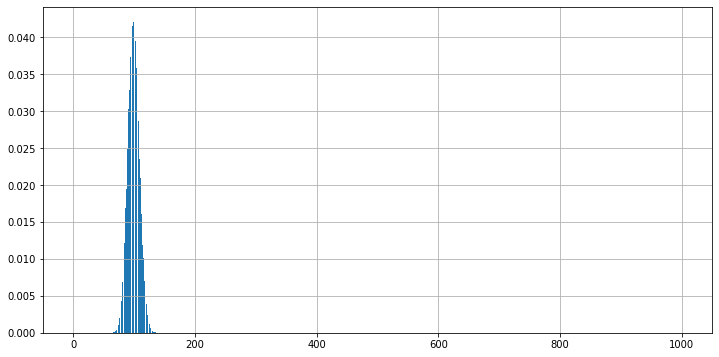

In [76]:
n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(1, n + 2):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)

plt.figure(figsize=(12,6))    
plt.bar(range(0, n+1), distr)
plt.grid()
plt.show()

**С увеличением количества пользователей, которым предложили акцию, вероятность выполнить план - растет, следовательно, вероятность не выполнить план - падает. Нам нужно, чтобы эта вероятность была равно приблизительно 5%**

In [77]:
#С помощью кумулятивной функции расчитаем вероятность:
binom.cdf(100, 1000, 0.1)

0.5265990812951653

**Интерпритируюя на простой язык: Из 1000 пользователей с вероятностью 53% можно выбрать 100 пользователей, которые оформят подсписку. (С учетом, что каждый 10-ый оформляет)**

- Увеличивая количество пользователей, с помощью цикла, добьемся вероятность в 5%

In [78]:
n=1000 # - указывалось в предыдущих ячейках:
for i in range(0,200):
    n = 1000 + i
    if binom.cdf(100, n, 0.1) < 0.05:
        print(f'Вероятность не выполнить план:{binom.cdf(100, n, 0.1)}')
        print()
        print(f'Количетсво пользователей, которые должны поучаствовать в акции: {n}')
        break    

Вероятность не выполнить план:0.04954795210203071

Количетсво пользователей, которые должны поучаствовать в акции: 1172


**Нужно, чтобы в акции участвовало минимум 1172 пользователя, тогда вероятность не выполнить план составит порядка 5%**

- **Увеличим количество участников на 172**

#### График распределения

**Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

- Снова биномиальное распределение
- p = 0,4
- n = 1 млн уведомлений
- нужно определить вероятность открытия более 399.5 тыс уведомлений

**Математическое ожидание и стандартное отклонение нормального распределения, которым аппроксимируют биномиальное, просто берутся равными мат.ожиданию и стандартному отклонению этого биномиального распределения.**

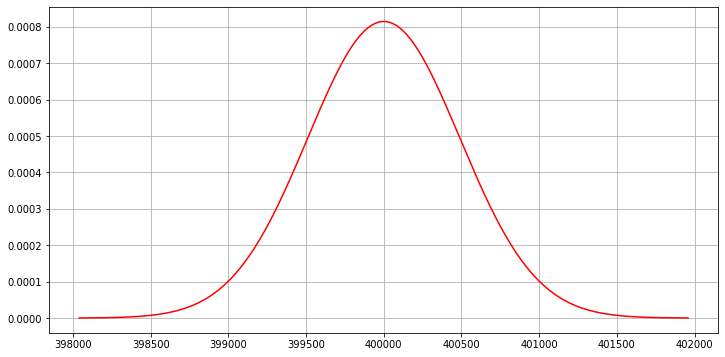

In [79]:
n = 1_000_000
p = 0.4
#мат.ожидание для биномиального и апроксимирующего нормального распределения:
mu = n * p
#стандартное отклонение по анлогии для обоих распределений:
sigma = sqrt(n * p * (1 - p))

#Границы интервала для графика:
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)

#Интервал:
x = list(range(left, right, 1))

plt.figure(figsize=(12,6))
plt.plot(x, st.norm.pdf(x, mu, sigma), c='r')
plt.grid()
plt.show()

**Выведем вероятность попасть в интервал от нуля до 399.5 тыс:**

In [80]:
distr = st.norm(mu, sigma)
distr.cdf(399_500)

0.15371708296369768

**Вероятность, что уведомления откроют не более 399.5 тыс. пользователей - порядка 15% процентов**

<a id='section_8'></a>

### Шаг 8. Общий вывод

**1. На первом шаге была выгружена и изучена общая информация**

- Имеется 3 датафрейма с информацией о пользователях, их поездках и данные о подписках

- Самый большой объем данных был у датафрейма с поездками 18 тысяч строк

---

**2. На втором шаге была выполнена предобработка данных**

- Проверели назнание переменных в столбцах (ошибок не выявлено)

- Изменили типы данных, преобразовали переменные в временные, где это было необходимо

- Выполнили проверку на наличие пропусков (пропусков не выявлено)

- Выполнили проверку на наличие дубликатов (выявлен **31** дубликат и устранен)

Явные дубликаты были обнаружены в датафрейме *Users*

---

**3. Провели исследовательский анализ данных**

По результатам анализа было выявлено:

> Наибольшее количество пользователей за 2021 год, которые арендовали самокаты, это жители Пятигорска. Наименьшее количество арендующих пользователей оказалость в Москве.

> Относительно всех пользователей, которые используют аренду самокатов, подписку имеют **45,6%** от общего числа. Это достаточно большая доля.

> Самый маленький возраст, арендующих самокаты - **12 лет**. Самые старшие арендующие - **43 года**. Большой интервал, который включает детей, студентов и взрослых пользователей. Пиковое значение пришлосль на возраст **25 лет** - это пользователи, которые чаще всего арендуют самокаты.

> Расстояние, которые проезжают пользователи, если смотреть на квартильный размах - в среднем меняется в интервале от **2.5 - 3.7 км**. Медианное значение **3133** метра.

> Средняя продолжительность поездок составляет **18 мин**, если смотреть на медиану. Мода же показывает **19 минут** - чаще всего встречаемое значение.

---

**4. Объединенили данные**

На данном этапе данные сначала были объеденены в один большой датафрейм, для удобства работы. В последсвии мы разбили большой датафрейм на два поменьше по признаку **наличие подписки**. Это было необходимо для анализа группы пользователей с подписками и без, ведь оценка этих групп по отдельности очень важна. После разделения на две группы, мы построили гистограммы для оценки дистанции, которую проезжают пользователи, и времени использования электросамокатов для каждой из групп в отдельности. Наложив гистограммы друг на друга, мы увидели больше отличий, а именно:

- Разброс значений относительно среднего у пользователей без подписки намного выше на графике зависимоти количества аренд от дистанции. Также имеется небольшое смещение значений в меньшую сторону относительно среднего

- Из временных графиков виден перевес количества аренд людей с подпиской и без. Количество аренд у пользователей без подписки больше. Минимальное время аренды у пользователей с подпиской равно 4 минутам. Пользователи без подписки имеют значения ниже

---

**5. Подсчёт выручки**

Для удобства изначально была создата сводная таблица, сгруппированая по уникальному индентификатору пользователя и месяцам, в которую поместили следующие переменные:

- Количество поездок

- Суммарная дистанция за месяц

- Суммарное время поездки за месяц

- Цена минуты поездки

- Цена начала поездки

- Цена подписки (если она есть)

Исходя из этих данных в таблицу был добавлен еще один столбец ***income_month***, который показывает, какую прибыль принес клиент за конкретный месяц. Проссумировав все значения для всех клиентов по месяцам, была подсчитана общая выручка с аренд самокатов за 2021 год. Она составила почти **3,9 млн.руб.**

---

**6. Проверка гипотез**

Для того, чтобы понимать как увеличить количество пользователей с подписками, нужно проверить несколько гипотез связаных с ними:

- Нулевая гипотеза: **"Среднее время поездок с подпиской равно среднему времени без подписки"**

Данная гипотеза - отвергнута по результатам теста. Получается, что средняя продолжительность поездки людей с подпиской - больше, нежели без.

- Нулевая гипотеза: **"Среднее расстояние, которое проезжают пользователи с подпиской равно 3130 [м]"**

Нулевая гипотеза - не отвергается по результатам теста. Средняя дистанция, которую проезжают пользователи с подпиской, не привышает 3130 м.

- Нулевая гипотеза: **"Помесячная выручка от пользователей с подпиской равна помесячной выручке пользователей без подписки"**

Нулевая гипотеза - отвергается по результатам теста. Получается можно предположить, что помесячная выручка от пользователей с подпиской больше помесячной выручки пользователей без подписки

---

**7. Распределения**

> Акция

Был проведен эксперемент, в котором пользователям раздавали бесплатные подписки, а после истечения бесплатного периода - наблюдали, какая доля пользователей их **продлевала**. По результатам эксперемента 10% пользователей от общего числа - продлевало подписки. С помощью биномиального распределения мы определили, что необходимое количетсво пользователей, которые должны участвовать в акции, должно составлять **1172 участника**, чтобы с вероятностью в 95% 100 из них, продлили подписку.

> График распределения

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

- С помощью апроксимации Биномиального распределения Нормальным, мы построили график распределения.

- Определили, что вероятность того, что уведомления откроют не более 399.5 тыс. пользователей - порядка 15% процентов



**8. Рекомендации по развитию аренды самокатов**

Судя по полученным данным, можно сделать несколько логических рекомендаций по улучшению развития аренды самокатов:

- В городах, которые находятся южнее - спрос выше (Пятигорск, Краснодар, Ростов-на-Дону, Сочи). Возможно это связано с погодными условиями. Т.к. на юге преобладает солнечная погода, люди чаще используют электросамокаты. В свою очередь в Москве - самый низкий спрос. Для улучшения арендыЯ, возможно, стоит пересмотреть цену за минуты в зависимости от погодных условий. (Инвертивно такси). Снижать цену при плохих погодных условиях.

- Пиковое значение возраста 25 лет - для арендующих самокаты. Возможно стоит больше заинтересовать группы людей от 14 до 18 лет в использовании самокатов. Ввести скидки для студентов и школьников. Тогда клиентская база в этом сегменте - вырастет. Следовательно увеличится количество пользователей с подписками.

- Увеличить среднюю выручку при аренде можно за счет увеличения среднего времени аренды самокатов. Это можно сделать, добавив промежуточные интервалы оплаты со скидками. Например: задать аренду заблаговременно на полчаса, на час, и т.п. Арендовав самокат на определенное время - будет дешевле, чем поминутно. Зато увеличиться среднее время и уменьшется количество людей, которые арендуют самокаты до 5 мин.